In [1]:
import networkx as nx
BEIJING,CHANGCHUN,WULUMUQI,WUHAN,GUANGZHOU,SHENZHEN,BANGKOK,SHANGHAI,NEWYORK ='''BEIJING CHANGCHUN WULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK'''.split()
connection = {
    CHANGCHUN: [BEIJING,SHANGHAI,WUHAN],
    WULUMUQI: [BEIJING,SHANGHAI,GUANGZHOU], 
    BEIJING: [WULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN,BEIJING],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK,SHANGHAI],
    SHENZHEN: [WUHAN, BANGKOK,BEIJING],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [2]:
%matplotlib inline #显示图像

UsageError: unrecognized arguments: #显示图像


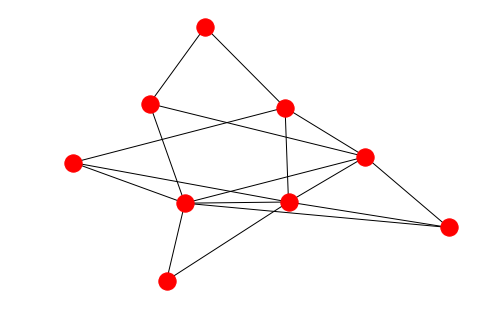

In [4]:
dictionary={}
graph = connection
g = nx.Graph(graph)
nx.draw(g)

In [5]:
def navigator(start, destination, connection_graph):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0) #取出当前最短路线
        frontier = path[-1] #取出路线中最后一个城市
        successors = connection_graph[frontier]
        if frontier in seen:
            continue
        for s in successors:
            if s==destination:
                path.append(s)
                return path
            else:
                pathes.append(path+[s])
        pathes = sorted(pathes,key=len)
        seen.add(frontier)

In [6]:
print(navigator(CHANGCHUN,GUANGZHOU,connection))

['CHANGCHUN', 'WUHAN', 'GUANGZHOU']


In [7]:
def nagivator_bfs(start, destination, connection_graph): #广度优先遍历
    pathes = [start]
    seen = set()
    while pathes:
        froniter = pathes.pop(0)       
        if froniter in seen: 
            continue
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
       # print('pathes:',pathes)        
        seen.add(froniter)

In [8]:
nagivator_bfs(CHANGCHUN,GUANGZHOU,connection)

standing on CHANGCHUN Looking forward ['BEIJING', 'SHANGHAI', 'WUHAN']
standing on BEIJING Looking forward ['WULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN', 'BEIJING']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on WULUMUQI Looking forward ['BEIJING', 'SHANGHAI', 'GUANGZHOU']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK', 'BEIJING']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK', 'SHANGHAI']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']


In [9]:
def navigator_dfs(start, destination, connection_graph):#深度优先遍历
    pathes = [start]
    seen = set()
    while pathes:
        frontier = pathes.pop(0)
        if frontier in seen:
            continue
        seccessors = connection_graph[frontier]
        print('standing on {} Looking forward {}'.format(frontier, seccessors))
        pathes = seccessors + pathes
        seen.add(frontier)

In [10]:
print(navigator_dfs(CHANGCHUN,GUANGZHOU,connection))

standing on CHANGCHUN Looking forward ['BEIJING', 'SHANGHAI', 'WUHAN']
standing on BEIJING Looking forward ['WULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on WULUMUQI Looking forward ['BEIJING', 'SHANGHAI', 'GUANGZHOU']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN', 'BEIJING']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK', 'SHANGHAI']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK', 'BEIJING']
None
